Implementation of K-means clustering and principal components analysis utilizing Python's numpy package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.io import loadmat

In [2]:
#Euclidean distance between 2 points.
def euclid(x, y):
    return np.sum((x - y)**2)

In [4]:
#Manhattan distance between 2 points.
def manhattan(x, y):
    return np.sum(np.abs(x - y))

inf


In [27]:
#Given a observations X and a set of centroids, find closest centroid for each observation in X using the given distance metric.
def find_closest(X, centroids, distance=euclid):
    m = X.shape[0]  #number of observations
    k = centroids.shape[0] #number of centroids
    idx = np.zeros(m)
    cost = 0.0
    
    for i in xrange(m):
        min_dist = float("inf")
        for j in xrange(k)
            dist = distance(X[i, :], centroids[j, :]) #distance between observation i and centroid j
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
        cost += min_dist
    return idx, cost

In [39]:
data = loadmat("ex7data2.mat")
X = data["X"]
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest(X, initial_centroids)

In [18]:
#recompute centroid locations
def compute_centroids(X, idx, k):
    m, n = X.shape #rows, columns in data X
    centroids = np.zeros((k, n)) #k by n array for k clusters with n dimensions per cluster
    
    for i in xrange(k):
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(X[indices, :], axis=1) / len(indices[0])).ravel() 
    return centroids

In [19]:
compute_centroids(X, idx, 3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [22]:
def kmeans(X, initial_centroids, max_iters, dist_function=euclid):
    m, n = X.shape
    k = initial_centroids.shape[0] #number of clusters
    idx = np.zeros(m)  #cluster assignments
    centroids = initial_centroids
    costs = []
    
    for i in xrange(max_iters):
        idx, cost = find_closest(X, centroids, distance=dist_function)
        costs.append(cost)
        centroids = compute_centroids(X, idx, k)
        
    return idx, centroids, costs

In [43]:
#Randomize initial centroid location
def rand_centroids(X, k):
    m = X.shape[0]
    shuffle = np.copy(X)
    np.random.shuffle(shuffle)
    return shuffle[:k, :]

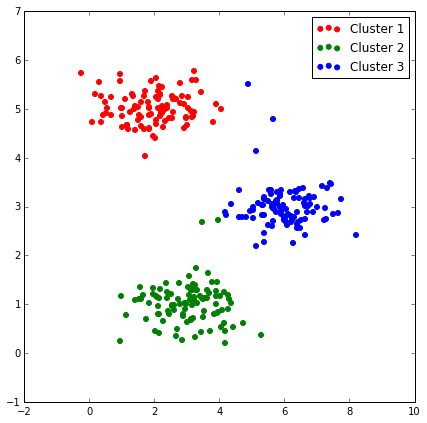

In [64]:
idx, centroids, costs = kmeans(X, initial_centroids, 20, dist_function=euclid)
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

plt.figure(figsize=(7, 7))
plt.scatter(cluster1[:, 0], cluster1[:, 1], s=25, color="r", label="Cluster 1")
plt.scatter(cluster2[:, 0], cluster2[:, 1], s=25, color="g", label="Cluster 2")
plt.scatter(cluster3[:, 0], cluster3[:, 1], s=25, color="b", label="Cluster 3")
plt.legend()

In [79]:
#Run k-means clustering multiple times from different random initializations of centroid locations 
#and find the best resulting clustering assignemtn.
def multiKmeans(X,  k, maxiters, num_trials=50, distance_func=euclid, verbose = True, plot=True):
    trialCosts = []
    best_cost = float("inf")
    best_idx, best_centroids = None, None
    for i in xrange(num_trials):
        rando = rand_centroids(X, k=k)
        idx, centroids, cost = kmeans(X, rando, maxiters, distance_func)
        trialCosts.append(cost[-1])
        if cost[-1] < best_cost:
            best_cost = cost[-1]
            best_idx = idx
            best_centroids = centroids
    if verbose:
        print "The best cost is ", best_cost
        print "The worst cost is ", max(trialCosts)
        print "Average cost is ", np.mean(trialCosts)
        print "Median cost is ", np.median(trialCosts)
    if plot:
        plt.figure(figsize=(8, 8))
        colors = ["m", "c", "r", "g", "b", "y"]
        for i in range(k):
            cluster = X[np.where(best_idx == i)[0], :]
            plt.scatter(cluster[:, 0], cluster[:, 1], s=25, color=colors[i], label="Cluster %d" %(i + 1))
        plt.legend()
    return best_idx, best_centroids, best_cost

The best cost is  211.482225201
The worst cost is  233.320938461
Average cost is  218.908496036
Median cost is  216.589638046
[[ 2.67056574  5.07123915]
 [ 1.15931046  4.9814591 ]
 [ 3.04367119  1.01541041]
 [ 6.04523932  2.97521013]]


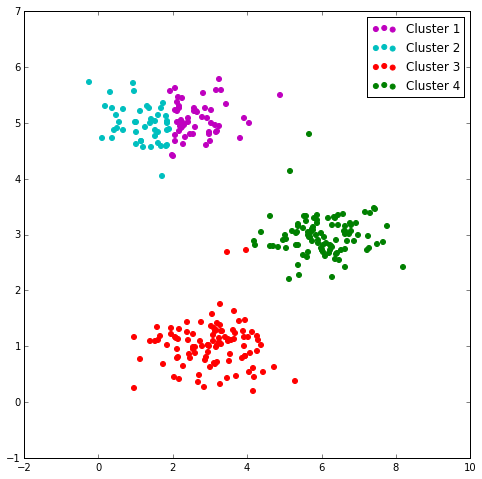

In [80]:
best_idx, best_centroids, best_cost = multiKmeans(X, 4, 10, num_trials=20)
print best_centroids

In [72]:
Ks = [1, 2, 3, 4, 5, 6, 7, 8]
bCosts = []
for k in Ks:
    best_idx, best_centroids, best_cost = multiKmeans(X, k, 10, num_trials=25, verbose=False, plot=False)
    bCosts.append(best_cost)

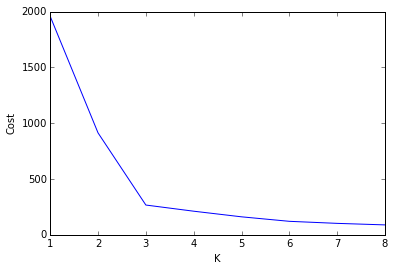

In [73]:
#Plot of cost vs. number of centroids
plt.plot(Ks, bCostsstplt.xlabelxlabelplt.ylabellt.ylabel("Cost")

In [65]:
from IPython.display import Image

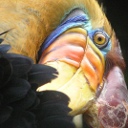

In [66]:
Image("bird_small.png")

In [67]:
bird = loadmat("bird_small.mat")

In [68]:
A = bird["A"]
A.shape

(128L, 128L, 3L)

In [69]:
A = A / 255.0
x = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print x.shape

(16384L, 3L)


In [20]:
data = loadmat("ex7data1.mat")

In [22]:
X = data["X"]
X.shape

(50L, 2L)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


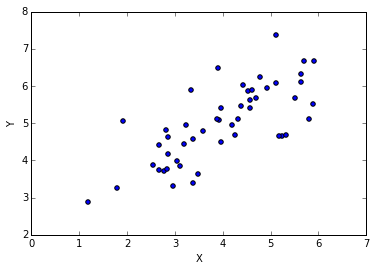

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X")
plt.ylabel("Y")

In [37]:
def pca(X):
    X = (X - X.mean()) / X.std() #normalization of data
    X = np.matrix(X)
    
    m = X.shape[0] #number of observations
    cov = (1.0 / m) * (X.T * X) #covariance matrix of normalized data
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [39]:
U, S, V = pca(X)
print X.shape
print U.shape
print S.shape
print V.shape

(5000L, 1024L)
(1024L, 1024L)
(1024L,)
(1024L, 1024L)


In [8]:
def project_data(X, U, k):
    U_reduce = U[:, :k]
    return np.dot(X, U_reduce)

In [9]:
Z = project_data(X, U, 1)

In [10]:
def recover_data(X, U, k):
    U_reduce = U[:, :k]
    return np.dot(Z, U_reduce.T)

In [11]:
X_recover = recover_data(X, U, 1)

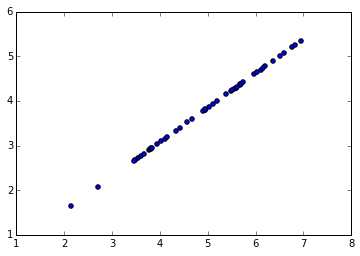

In [12]:
plt.scatter(X_recover[:, 0], X_recover[:, 1])

In [48]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=1)
pca.fit(X)
print pca.explained_variance_ratio_

[ 0.87062385]


In [24]:
X_reduce = pca.fit_transform(X)
print X_reduce.shape

(50L, 1L)


In [25]:
X_recover = pca.inverse_transform(X_reduce)
print X_recover.shape

(50L, 2L)


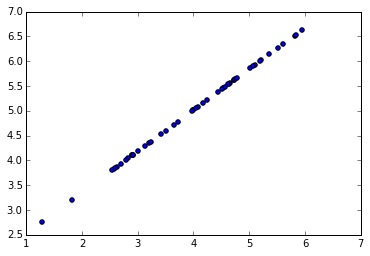

In [26]:
plt.scatter(X_recover[:, 0], X_recover[:, 1])

In [40]:
faces = loadmat("ex7faces.mat")
X = faces["X"]
print X.shape

(5000L, 1024L)


In [63]:
from scipy import ndimage

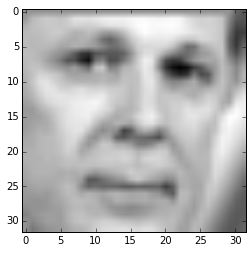

In [78]:
face = np.reshape(X[2017, :], (32, 32))
rotated = ndimage.rotate(face, -90)
plt.imshow(rotated, cmap="gray")

In [51]:
pc = PCA(n_components=100)
pc.fit(X)

0.674421340552


In [53]:
print np.sum(pc.explained_variance_ratio_[:100])

0.932861765966


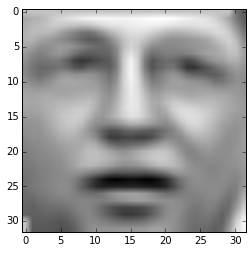

In [74]:
X_reduce = pc.fit_transform(X)
X_recover = pc.inverse_transform(X_reduce)

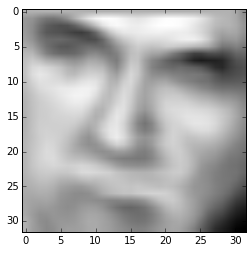

In [75]:
face = np.reshape(X_recover[200, :], (32, 32))
rotated = ndimage.rotate(face, -90)
plt.imshow(rotated, cmap="gray")

In [70]:
U, S, V = pca(X)
Z = project_data(X, U, 100)